## EDA (Exploratory Data Analysis)
In this section our goal is to derive some key insights from the data that we will be continuing to clean, transform and manipulate for our data analysis. We would like to understand what causes churn and what factors are contributing to higher churn rates if any. Some questions we would like to answer are:
1. Do customers who pay more lead to higher churn rates? (Numeric Features vs Churn)
2. Do customers who have a lower tenure tend to have higher churn rates? (Numeric Features vs Churn)
3. What categories are linked to higher churn rates? (categorical Features vs Churn)
4. Are certain combinations especially risky? (Cross Feature Insights)

In [1125]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

We want to begin with locating the relevant data that we will be working with. 

In [1126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


When we run the code "data.info()" we receive an output of some basic information from our data set. Taking a look at this we can say that some important insights are Tenure, Monthly Charges, Total Charges, Churn, Contract, Payment Method. Let's go ahead and create a data frame with this information. 

In [1127]:
edaMetrics = data[["tenure","MonthlyCharges","TotalCharges","Churn","Contract","PaymentMethod", "InternetService"]]
edaMetrics.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Contract,PaymentMethod,InternetService
0,1,29.85,29.85,No,Month-to-month,Electronic check,DSL
1,34,56.95,1889.5,No,One year,Mailed check,DSL
2,2,53.85,108.15,Yes,Month-to-month,Mailed check,DSL
3,45,42.30,1840.75,No,One year,Bank transfer (automatic),DSL
4,2,70.70,151.65,Yes,Month-to-month,Electronic check,Fiber optic


We are able to see that this information has now been organized into a data frame where we can visually see what we are doing. Let's begin by answering our first question. 
1. Do Customers who pay more tend to churn at a higher rate?

We can accomplish this by using a groupby statement and using our churn column as our index and "MonthlyCharges" column as our values to calculate churn by amount charged per month. We can then see the average amount paid based off whether a customer churned or stayed. 

In [1128]:
"$" + edaMetrics.groupby("Churn")["MonthlyCharges"].mean().round(1).astype(str)

Churn
No     $61.3
Yes    $74.4
Name: MonthlyCharges, dtype: object

We are able to see that the average amount paid by customers who stayed was $64 and those who churned was $74 a month showing that these customers paid more on average. It is too risky to say that this was the sole cause of customers churning however it can be a cause so we should take this into account when conducting further churn analysis. 

We need to now examine our next question and revisit this calculation in further plotting and data analysis for churn. It is important to look at multiple angles to interpret the entire data set and give accurate reports. 

The next question we would like to answer is: 
1. Whether customers with lower tenure are more likely to churn? 
We can answer this by comparing lower tenure rates to higher tenure rates and seeing if lower tenure led to higher churn rates. 

In [1129]:
edaMetrics["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

A great way to determining what type of data that we are working with is by using the ".describe()" method which gives us valuable insights toward the data we are working with. When we ran this command we are able to see various metrics that are being completed. One metric that immediately speaks out to me is the max metric which depicts 72. This allows me to make the inference that tenure is most likely tracking months not days. However, it is important to note that while it is most likely months we should always attempt to ask the source as to what this data is measuring instead of guessing. The ".describe()" method is used to gather insight, not give you a for sure answer. 

In [1130]:
edaMetrics.groupby("Churn")["tenure"].mean().round(0).astype(str) + " Months"

Churn
No     38.0 Months
Yes    18.0 Months
Name: tenure, dtype: object

We are able to see that the average tenure between customers that churned was 18 months or the equivalent of 1 year and a half. This allows for us to understand that tenure may be playing a role in the churn rate for this customer database. We should continue along with our data analysis however, this is valuable information to consider as this may be a red flag indicator as to why customers are churning. 

In [1131]:
edaMetrics["Contract"].describe()

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

In [1132]:
edaMetrics.head(15)

,tenure,MonthlyCharges,TotalCharges,Churn,Contract,PaymentMethod,InternetService
0,1,29.85,29.85,No,Month-to-month,Electronic check,DSL
1,34,56.95,1889.5,No,One year,Mailed check,DSL
2,2,53.85,108.15,Yes,Month-to-month,Mailed check,DSL
3,45,42.30,1840.75,No,One year,Bank transfer (automatic),DSL
4,2,70.70,151.65,Yes,Month-to-month,Electronic check,Fiber optic
5,8,99.65,820.5,Yes,Month-to-month,Electronic check,Fiber optic
6,22,89.10,1949.4,No,Month-to-month,Credit card (automatic),Fiber optic
7,10,29.75,301.9,No,Month-to-month,Mailed check,DSL
8,28,104.80,3046.05,Yes,Month-to-month,Electronic check,Fiber optic
9,62,56.15,3487.95,No,One year,Bank transfer (automatic),DSL


Using the ".describe()" method gives some insight as to what information is being contained in the Contract Column. We can see that there are 3 distinct values found within the Contract column. I use the ".head()" method to locate the 3 distinct types of values that are held within the Contract Column. I can now continue with my data analysis. My question to answer is **Does contract type have an effect on churn rate?** This will show how categorical data affects churn rate.

We want to find out if contract length is affecting churn rate so the first thing we should do is compare each contract type and its churn response. 

In [1133]:
pd.crosstab(edaMetrics["Contract"], edaMetrics["Churn"], normalize = "index").mul(100).round(0).astype(str)+ " %"

Churn,No,Yes
Contract,,
Month-to-month,57.0 %,43.0 %
One year,89.0 %,11.0 %
Two year,97.0 %,3.0 %


I asked myself the question, **How can I compare two column categories where numerical columns are not being used but rather categorical data?** After researching how to best approach the problem I came accross the method "pd.crosstab" which essentially allows for proportions to take place which is great when working with categorical data. This function also allows for normalization. What this means is that we scale the numbers being on a 1% - 100% point scale rather then just comparing raw values which can be misleading when working with large datasets. Instead we allow for a proportion to take place. In this way we can see that out of all the month-to-month contract types 57% did not churn and 43% churned.

Now let's perform the same logic on the following categories:

PaymentMethod

Internet Service

In [1134]:
pd.crosstab(edaMetrics["PaymentMethod"], edaMetrics["Churn"], normalize = "index").mul(100).round(0).astype(str) + " %"

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.0 %,17.0 %
Credit card (automatic),85.0 %,15.0 %
Electronic check,55.0 %,45.0 %
Mailed check,81.0 %,19.0 %


I chose to compare Payment Methods and Churn to better understand how different types of payment can potentially be affecting the churn rate. Are bank transfers more effective at keeping customers or are Electronic Checks. The question is vital to help us answer the question of how to keep more customers. 

## What does pd.crosstab() Do? 
This allows for the cross tabulation of two different categories. For example it will build a table showing how two categorical variables relate to each other. In this scenario we are viewing how churn responses relate to payment methods. To break this down further we do the following steps: 
1. We first select each distinct payment method
2. We then compare these results with their respective churn response
3. We normalize this collected data to give us an accurate representation of churn rates in relation to payment method

In [1135]:
pd.crosstab(edaMetrics["InternetService"], edaMetrics["Churn"], normalize = "index").mul(100).round(0).astype(str) + " %"

Churn,No,Yes
InternetService,,
DSL,81.0 %,19.0 %
Fiber optic,58.0 %,42.0 %
No,93.0 %,7.0 %


I compare Internet Services vs Churn to see if the type of internet a customer holds affects their churn response. If a customer is paying for fiber optic internet services they must already have a high monthly payment. So this could be reflective of their commitment to another monthly payment. 

This data is very insightful, and will allow us to make more accurate inferences as to what is causing customers to churn. As well as allow us to better understand how we can prevent it. Next we will tackle some visual interpretations to better analyze our data. 

In [1136]:
avgMonthly = edaMetrics["MonthlyCharges"].mean().round(1)
hiMonthly = edaMetrics["MonthlyCharges"] > avgMonthly
loMonthly = edaMetrics["MonthlyCharges"] <= avgMonthly


edaMetrics[hiMonthly]["Churn"].value_counts(normalize = True).mul(100).round(0).astype(str)+ " %"

Churn
No     65.0 %
Yes    35.0 %
Name: proportion, dtype: object

Let's tackle this block of code piece by piece to further understand why we are approaching our problem this way. 

1. To start we first want to find the average monthly charge to determine an accurate baseline of the average monthly charge. 
2. We then label all respective data higher than the average as a high monthly rate
3. Similarly we label all respective data lower than the average as a low monthly rate
4. To compare this against churn rate we now use the command ".value_counts()" as a method of counting each unique value in the data sets respective column
5. An important step is normalizing this data which means that we will scale the numbers on a 1%-100% point scale. 

In [1137]:
edaMetrics[loMonthly]["Churn"].value_counts(normalize = True).mul(100).round(0).astype(str)+ " %"

Churn
No     84.0 %
Yes    16.0 %
Name: proportion, dtype: object

What we can infer from these two comparisons is that customers with a higher monthly charge are 19% more likely to churn!

## Graph Representation

Let's begin by seeing how monthly charges looks when put against Churn. 

What a box plot shows: 
1. The median line (Middle Value)
2. The box (Spread of middle 50%)
3. The Whiskers (min/max range)
4. The Outliers (dots outside)

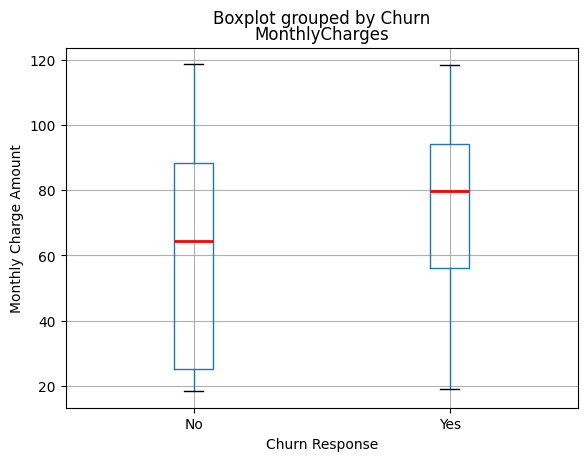

In [1138]:
edaMetrics.boxplot(column = "MonthlyCharges", by = "Churn", grid = True, 
    medianprops={"color": "red", "linewidth": 2})
plt.xlabel("Churn Response")
plt.ylabel("Monthly Charge Amount")
plt.show()

### What exactly are we showing in this box graph?
We are showing the spread of monthly charges in relation to each customer’s churn response. This box plot helps us visualize how much customers are paying and whether that relates to their likelihood of leaving.

From the graph, we can see that the median monthly charge for churned customers is between $70 and $80. Customers who churned and fall between the 50th and 75th percentile were generally paying above $80, while those between the 25th and 50th percentile were paying between $55 and $80.

Overall, this box plot suggests that customers who churned tended to pay more per month than those who stayed, indicating that higher charges may be linked to higher churn rates.

In [1139]:
# plt.hist(edaMetrics["MonthlyCharges"], bins=20)
# plt.title("Distribution of Monthly Charges")
# plt.xlabel("Monthly Charge ($)")
# plt.ylabel("Number of Customers")
# plt.show()